In [1]:
from merit import solve_problem
from helpers import plot_intervals, swiss_nsf
from generate_intervals import generate_uniform_intervals, generate_fixedwidth_intervals

import matplotlib.pyplot as plt

# Example 1

In [3]:
x = [16, 15, 14.5, 12, 10.75, 10.5, 8.2, 7.5, 6.5, 5.5]
w = 1 
I = [(y-w, y+w) for y in x]

Text(-0.03, 0.5, 'Quality')

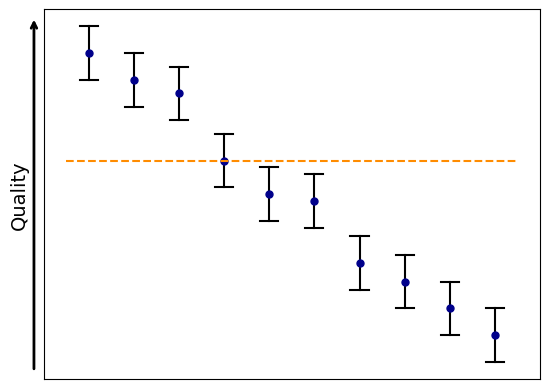

In [10]:
ax = plot_intervals(I, x=x, k=4, plot_swiss_nsf=True, show_axes=False)
ax.annotate(
    '', xy=(-0.02, 0.98), xytext=(-0.02, 0.02),
    xycoords='axes fraction', textcoords='axes fraction',
    arrowprops=dict(facecolor='black', arrowstyle='->', lw=2)
)
ax.text(-0.03, 0.5, 'Quality', rotation=90, va='center', ha='right', transform=ax.transAxes, fontsize=14)

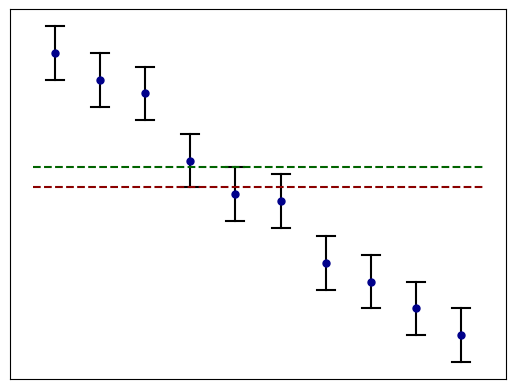

In [4]:
ax = plot_intervals(I, x=x, k=4, plot_algo=True, show_axes=False)

In [5]:
solve_problem(I, 4)

(array([1.        , 1.        , 1.        , 0.33333333, 0.33333333,
        0.33333333, 0.        , 0.        , 0.        , 0.        ]),
 3.3333333333333335,
 {'iterations': 1,
  'convergence': True,
  'total_cuts': 0,
  'n_vars': 1,
  'n_chains': 1,
  'n_mono_constraints': 0,
  'timing': {'symmetry_setup': 4.100799560546875e-05,
   'monotonicity_constraints_setup': 3.0994415283203125e-05,
   'optimization_loop_time': 6.175041198730469e-05,
   'total_time': 0.04002499580383301,
   'init_prune_time': 8.177757263183594e-05}})

In [6]:
swiss_nsf(I, x, 4)

[1, 1, 1, 1.0, 0, 0, 0, 0, 0, 0]

# Example 2

In [11]:
I = [
 (8, 9.3),
 (5.4, 8.5),
 (5.3, 7.5),
 (4.7, 6.3),
 (3,6),
 (2, 6),
 (0., 4.8),
 (0, 2),
 (0, 1.5),
 (0, 1)
]

x = [(i[1] + i[0])/2. for i in I]

In [12]:
# sort intervals by LCB 
I = sorted(I, key=lambda interval: interval[0], reverse=True)
x = [(interval[1] + interval[0]) / 2. for interval in I]

Text(-0.03, 0.5, 'Quality')

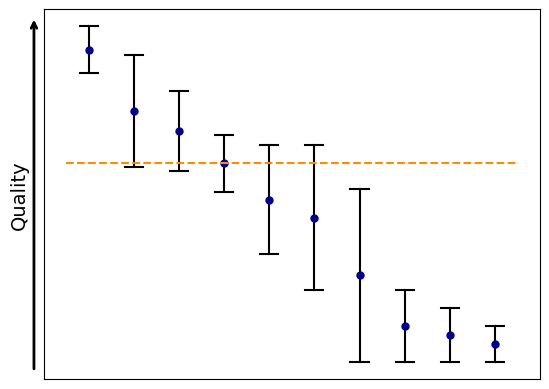

In [ ]:
ax = plot_intervals(I, x=x, k=4, plot_swiss_nsf=False, show_axes=False)

ax.annotate(
    '', xy=(-0.02, 0.98), xytext=(-0.02, 0.02),
    xycoords='axes fraction', textcoords='axes fraction',
    arrowprops=dict(facecolor='black', arrowstyle='->', lw=2)
)
ax.text(-0.03, 0.5, 'Quality', rotation=90, va='center', ha='right', transform=ax.transAxes, fontsize=14)

In [10]:
solve_problem(I, 4)

(array([1.  , 0.75, 0.75, 0.5 , 0.5 , 0.5 , 0.  , 0.  , 0.  , 0.  ]),
 2.5,
 {'iterations': 2,
  'convergence': True,
  'total_cuts': 3,
  'n_vars': 3,
  'n_chains': 1,
  'n_mono_constraints': 2,
  'timing': {'symmetry_setup': 4.792213439941406e-05,
   'monotonicity_constraints_setup': 0.00010323524475097656,
   'optimization_loop_time': 5.0067901611328125e-05,
   'total_time': 0.0051038265228271484,
   'init_prune_time': 3.3855438232421875e-05}})

## Monotonicity Example

In [2]:
I = [
    (9, 10),
    (5, 9.7),
    (4,8),
    (4, 8)
]

x = [(i[1] + i[0])/2. for i in I]

<Axes: >

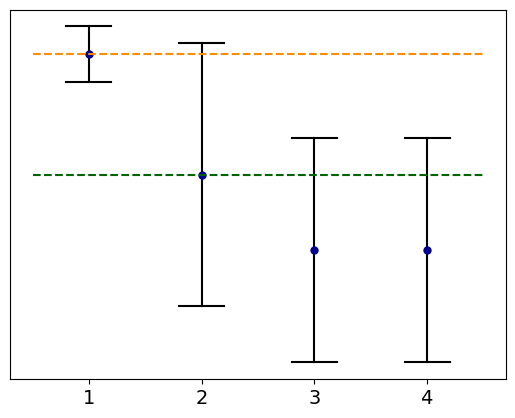

In [3]:
plot_intervals(I, x=x, k=[1,2], plot_swiss_nsf=True, show_axes=True, hide_y=True)

In [1]:
from generate_intervals import load_neurips_subjectivity_intervals

In [8]:
x, intervals, decisions = load_neurips_subjectivity_intervals()

In [9]:
k = min(decisions.value_counts()) # number of reject decisions

## Reversal Symmetry Example

## Example 3

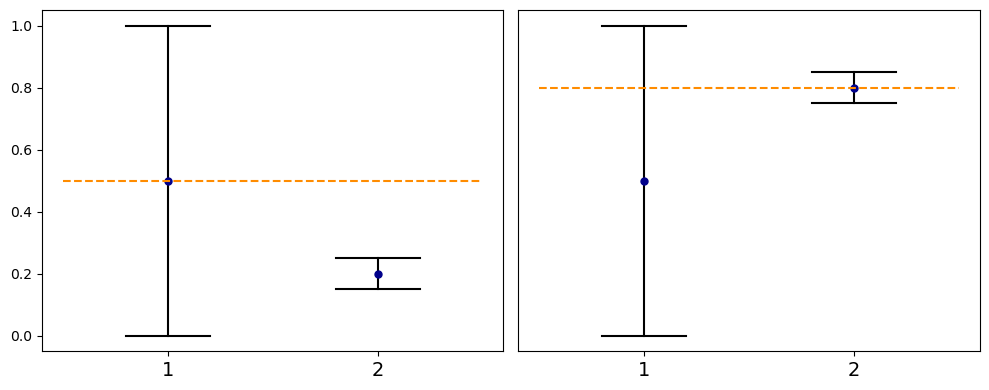

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# First intervals
I1 = [(0,1), (0.15, 0.25)]
x1 = [(i[1] + i[0])/2. for i in I1]
plot_intervals(I1, x=x1, k=1, plot_swiss_nsf=True, show_axes=True, hide_y=False, ax=axes[0])

# Second intervals (using existing I and x)
plot_intervals(I, x=x, k=1, plot_swiss_nsf=True, show_axes=True, hide_y=True, ax=axes[1])

# turn off axis labels
for ax in axes:
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

<Axes: xlabel='Interval', ylabel='Score'>

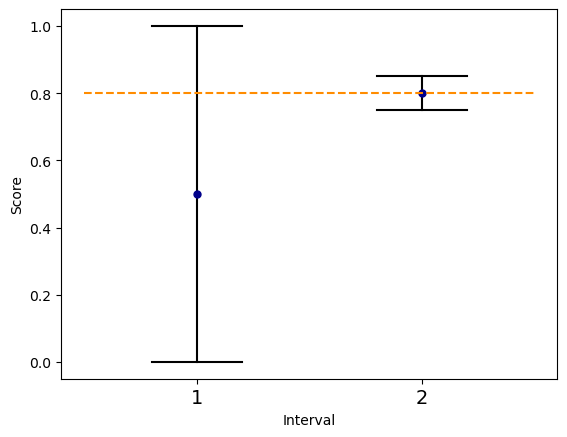

<Axes: xlabel='Interval', ylabel='Score'>

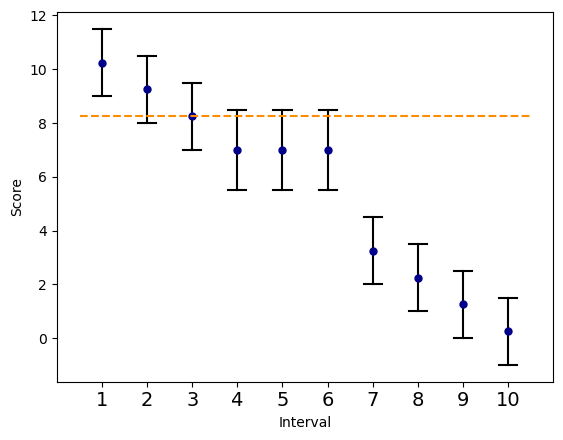

In [87]:
I = ((11.5, 9),
     (10.5, 8),
     (9.5, 7),
     (8.5, 5.5),
     (8.5, 5.5),
     (8.5, 5.5),
     (4.5, 2),
     (3.5, 1),
     (2.5, 0),
     (1.5, -1))
I = [(i[1], i[0]) for i in I]
x = [(i[1] + i[0])/2. for i in I]
k = 3
plot_intervals(I, x=x, k=k, plot_swiss_nsf=True)

In [88]:
swiss_nsf(I, x, k)

[1, 0.4, 0.4, 0.4, 0.4, 0.4, 0, 0, 0, 0]

In [89]:
p,_,_ = solve_problem(I, k)
p

array([1. , 0.4, 0.4, 0.4, 0.4, 0.4, 0. , 0. , 0. , 0. ])

<Axes: xlabel='Interval', ylabel='Score'>

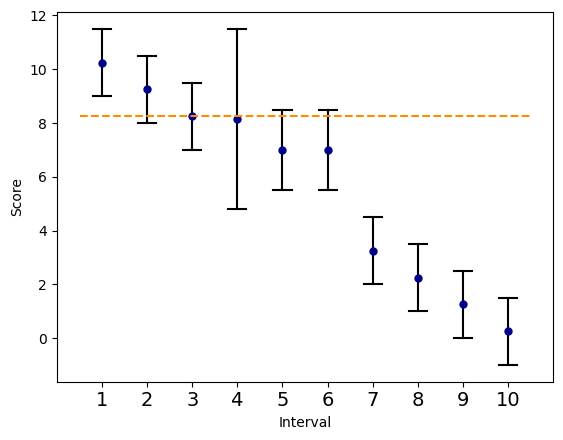

In [90]:
J = I.copy()
J_max = max([i[1] for i in J])
J[3] = (J[3][0]-0.7, J_max)
x[3] = (J[3][1] + J[3][0]) / 2. 
plot_intervals(J, x=x, k=k, plot_swiss_nsf=True)

In [91]:
swiss_nsf(J, x, k)

[1, 0.4, 0.4, 0.4, 0.4, 0.4, 0, 0, 0, 0]

In [92]:
solve_problem(J, k)

(array([1.  , 0.5 , 0.5 , 0.5 , 0.25, 0.25, 0.  , 0.  , 0.  , 0.  ]),
 1.5,
 {'iterations': 2,
  'convergence': True,
  'total_cuts': 3,
  'n_vars': 3,
  'n_chains': 1,
  'n_mono_constraints': 2,
  'timing': {'symmetry_setup': 3.1948089599609375e-05,
   'monotonicity_constraints_setup': 5.626678466796875e-05,
   'optimization_loop_time': 4.00543212890625e-05,
   'total_time': 0.0039348602294921875,
   'init_prune_time': 2.8371810913085938e-05}})

<Axes: xlabel='Interval', ylabel='Score'>

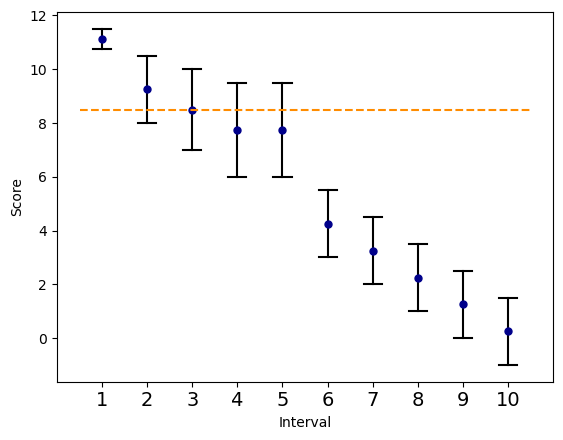

In [14]:
I = ((11.5, 10.75),
     (10.5, 8),
     (10, 7),
     (9.5, 6),
     (9.5, 6),
     (5.5, 3),
     (4.5, 2),
     (3.5, 1),
     (2.5, 0),
     (1.5, -1))
I = [(i[1], i[0]) for i in I]
x = [(i[1] + i[0])/2. for i in I]
k = 3
plot_intervals(I, x=x, k=k, plot_swiss_nsf=True)

In [129]:
swiss_nsf(I, x, k)

[1, 0.5, 0.5, 0.5, 0.5, 0, 0, 0, 0, 0]

In [130]:
solve_problem(I, k)

(array([1. , 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. , 0. , 0. ]),
 2.0,
 {'iterations': 1,
  'convergence': True,
  'total_cuts': 0,
  'n_vars': 1,
  'n_chains': 1,
  'n_mono_constraints': 0,
  'timing': {'symmetry_setup': 8.606910705566406e-05,
   'monotonicity_constraints_setup': 3.62396240234375e-05,
   'optimization_loop_time': 0.0001971721649169922,
   'total_time': 0.007928848266601562,
   'init_prune_time': 3.075599670410156e-05}})

<Axes: xlabel='Interval', ylabel='Score'>

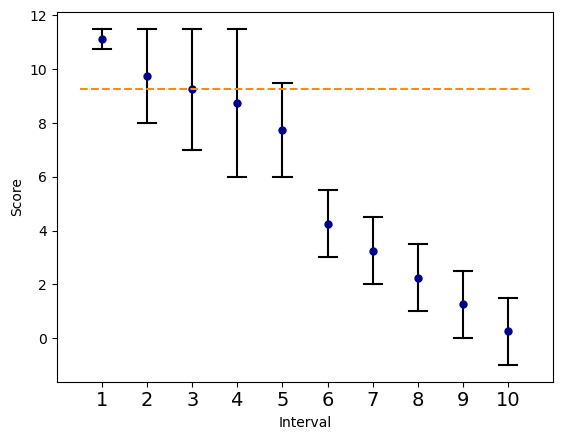

In [15]:
J = ((11.5, 10.75),
     (11.5, 8),
     (11.5, 7),
     (11.5, 6),
     (9.5, 6),
     (5.5, 3),
     (4.5, 2),
     (3.5, 1),
     (2.5, 0),
     (1.5, -1))
J = [(i[1], i[0]) for i in J]
x = [(i[1] + i[0])/2. for i in J]
k = 3
plot_intervals(J, x=x, k=k, plot_swiss_nsf=True)

Text(-0.03, 0.5, 'Quality')

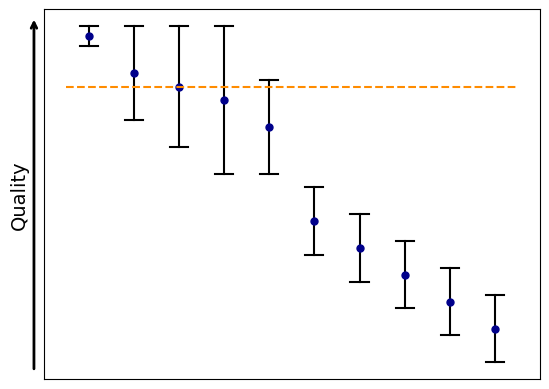

In [16]:
ax = plot_intervals(J, x=x, k=k, plot_swiss_nsf=True, show_axes=False)
ax.annotate(
    '', xy=(-0.02, 0.98), xytext=(-0.02, 0.02),
    xycoords='axes fraction', textcoords='axes fraction',
    arrowprops=dict(facecolor='black', arrowstyle='->', lw=2)
)
ax.text(-0.03, 0.5, 'Quality', rotation=90, va='center', ha='right', transform=ax.transAxes, fontsize=14)

In [17]:
swiss_nsf(J, x, k)

[1, 0.5, 0.5, 0.5, 0.5, 0, 0, 0, 0, 0]

In [18]:
solve_problem(J, k)

(array([1. , 0.6, 0.6, 0.6, 0.2, 0. , 0. , 0. , 0. , 0. ]),
 1.8,
 {'iterations': 2,
  'convergence': True,
  'total_cuts': 3,
  'n_vars': 3,
  'n_chains': 1,
  'n_mono_constraints': 2,
  'timing': {'symmetry_setup': 0.0001659393310546875,
   'monotonicity_constraints_setup': 8.7738037109375e-05,
   'optimization_loop_time': 4.887580871582031e-05,
   'total_time': 0.04342913627624512,
   'init_prune_time': 0.00016999244689941406}})

<Axes: xlabel='Interval', ylabel='Score'>

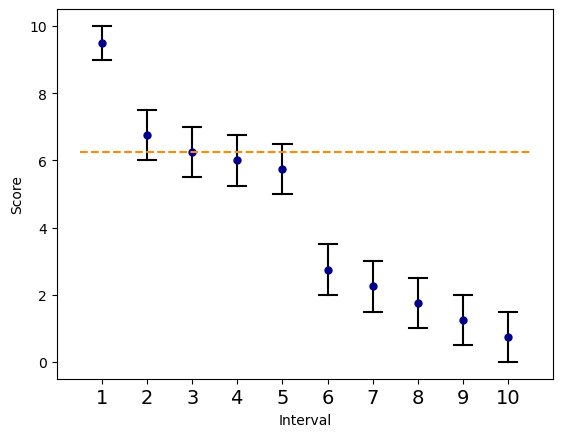

In [151]:
I = [(9, 10),
     (6,7.5),
     (5.5,7),
     (5.25, 6.75),
     (5,6.5),
     (2,3.5),
     (1.5,3), 
     (1,2.5),
     (0.5,2),
     (0,1.5)]
x = [(i[1] + i[0])/2. for i in I]
k = 3
plot_intervals(I, x=x, k=k, plot_swiss_nsf=True)

In [152]:
swiss_nsf(I, x, k)

[1, 0.5, 0.5, 0.5, 0.5, 0, 0, 0, 0, 0]

In [153]:
solve_problem(I, k)

(array([1. , 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. , 0. , 0. ]),
 2.0,
 {'iterations': 1,
  'convergence': True,
  'total_cuts': 0,
  'n_vars': 1,
  'n_chains': 1,
  'n_mono_constraints': 0,
  'timing': {'symmetry_setup': 3.4809112548828125e-05,
   'monotonicity_constraints_setup': 2.09808349609375e-05,
   'optimization_loop_time': 7.104873657226562e-05,
   'total_time': 0.0044231414794921875,
   'init_prune_time': 2.7179718017578125e-05}})

<Axes: xlabel='Interval', ylabel='Score'>

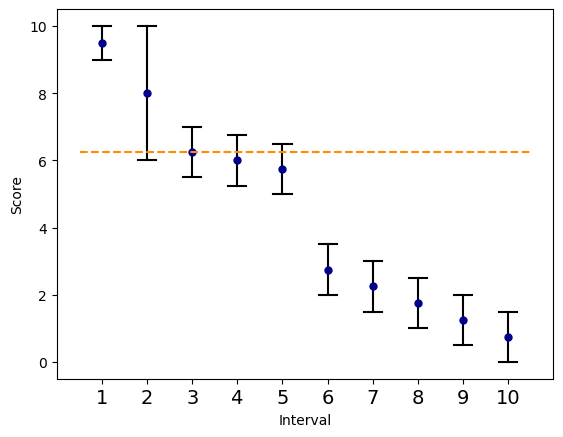

In [154]:
J = I.copy()
J[1] = (6, 10)
x[1] = (J[1][1] + J[1][0]) / 2.
plot_intervals(J, x=x, k=k, plot_swiss_nsf=True)

In [155]:
solve_problem(J, k)

(array([1. , 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. , 0. , 0. ]),
 2.0,
 {'iterations': 1,
  'convergence': True,
  'total_cuts': 0,
  'n_vars': 1,
  'n_chains': 1,
  'n_mono_constraints': 0,
  'timing': {'symmetry_setup': 2.8848648071289062e-05,
   'monotonicity_constraints_setup': 1.811981201171875e-05,
   'optimization_loop_time': 4.100799560546875e-05,
   'total_time': 0.003422975540161133,
   'init_prune_time': 2.7894973754882812e-05}})

## Max Instability Example

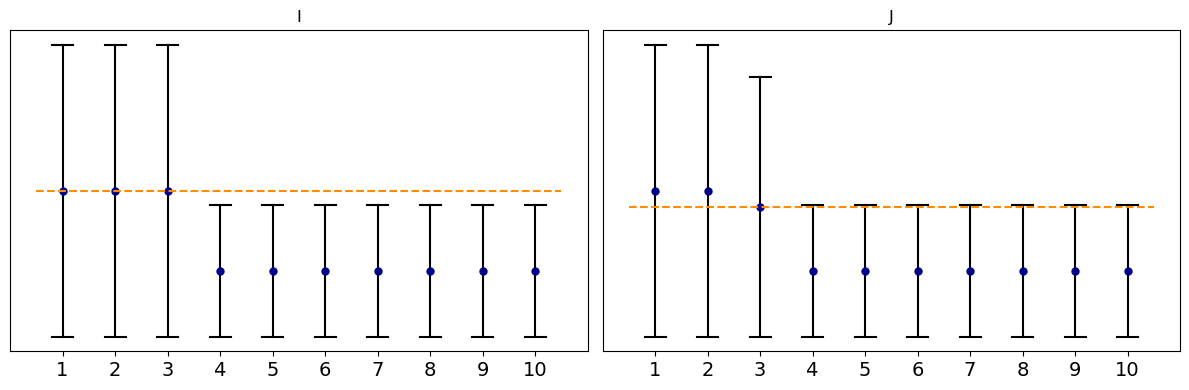

In [21]:
k = 3
n = 10
eps = 0.1

I =  [(0,2) for _ in range(k)] + [(0, 1-eps) for _ in range(n-k)]
x_I = [(i[1] + i[0])/2. for i in I]
J = I.copy()
x_J = x_I.copy()
J[k-1] = (0, 2-2.2*eps)
x_J[k-1] = (J[k-1][1] + J[k-1][0]) / 2.

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_intervals(I, x=x_I, k=k, plot_swiss_nsf=True, ax=axes[0], hide_y=True)
axes[0].set_title("I")
plot_intervals(J, x=x_J, k=k, plot_swiss_nsf=True, ax=axes[1], hide_y=True)
axes[1].set_title("J")
plt.tight_layout()
plt.show()

In [ ]:
k = 2
# Sigma_n = [1,2,3,4], [1,2,4,3], 
#           [1,3,2,4], [1,4,2,3],
#            [2,1,3,4], [2,1,4,3]